The Sun Also Rises (1926) http://gutenberg.ca/ebooks/hemingwaye-sunalsorises/hemingwaye-sunalsorises-00-h.html

Men Without Women (1927) http://gutenberg.ca/ebooks/hemingwaye-menwithoutwomen/hemingwaye-menwithoutwomen-00-h.html

Winner Take Nothing (1933) http://gutenberg.ca/ebooks/hemingwaye-winnertakenothing/hemingwaye-winnertakenothing-00-h.html

Green Hills of Africa (1935) http://gutenberg.ca/ebooks/hemingwaye-greenhillsofafrica/hemingwaye-greenhillsofafrica-00-h.html

Across the River and Into the Trees (1950) http://gutenberg.ca/ebooks/hemingwaye-acrosstheriver/hemingwaye-acrosstheriver-00-h.html

The Old Man and the Sea (1952) http://gutenberg.ca/ebooks/hemingwaye-oldmanandthesea/hemingwaye-oldmanandthesea-00-h.html

In [4]:
# Web Scraping
import requests
from bs4 import BeautifulSoup

# Preprocess
import spacy
import string
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('punkt')
stop_words = set(stopwords.words('english')) 
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import pandas as pd
import numpy as np

# EDA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to C:\Users\Louis
[nltk_data]     LIU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Louis
[nltk_data]     LIU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Louis
[nltk_data]     LIU\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Web Scraping using BeautifulSoup#

In [2]:
url = 'http://gutenberg.ca/ebooks/hemingwaye-sunalsorises/hemingwaye-sunalsorises-00-h.html'
res = requests.get(url)
html_page = res.content

soup = BeautifulSoup(html_page, 'html.parser')

text = soup.find_all(text=True)

set([t.parent.name for t in text])

{'[document]',
 'a',
 'b',
 'blockquote',
 'body',
 'div',
 'h1',
 'h2',
 'h3',
 'h4',
 'head',
 'html',
 'i',
 'p',
 'small',
 'title'}

In [3]:
output = ''
for t in text:
    if t.parent.name in ['p']:
        output += '{} '.format(t)
#output

In [4]:
def Web_Scraping(url):
    res = requests.get(url)
    html_page = res.content
    soup = BeautifulSoup(html_page, 'html.parser')
    text = soup.find_all(text=True)
    output = ''
    for t in text:
        if t.parent.name in ['p']:
            output += '{} '.format(t)
    output = output.strip().replace("\n", " ").replace("\r", " ").replace("\r\n", " ").replace("  ", " ")
    return output

In [5]:
url_1 = "http://gutenberg.ca/ebooks/hemingwaye-sunalsorises/hemingwaye-sunalsorises-00-h.html"
book_1 = Web_Scraping(url_1)
url_2 = "http://gutenberg.ca/ebooks/hemingwaye-menwithoutwomen/hemingwaye-menwithoutwomen-00-h.html"
book_2 = Web_Scraping(url_2)
url_3 = "http://gutenberg.ca/ebooks/hemingwaye-winnertakenothing/hemingwaye-winnertakenothing-00-h.html"
book_3 = Web_Scraping(url_3)
url_4 = "http://gutenberg.ca/ebooks/hemingwaye-greenhillsofafrica/hemingwaye-greenhillsofafrica-00-h.html"
book_4 = Web_Scraping(url_4)
url_5 = "http://gutenberg.ca/ebooks/hemingwaye-acrosstheriver/hemingwaye-acrosstheriver-00-h.html"
book_5 = Web_Scraping(url_5)
url_6 = "http://gutenberg.ca/ebooks/hemingwaye-oldmanandthesea/hemingwaye-oldmanandthesea-00-h.html"
book_6 = Web_Scraping(url_6)

# Text Preprocessing

## Ideas
- Number of distinct words (vocabulary)
- Lexical diversity = vocabulary/token ratio
- Distribution of word lengths
- Most frequent words
- Number of n-gram word (bigrams, trigrams, 4-grams, etc.)
- Usage of passive and active voice
- Usage of parts of speech (nouns, verb, adverbs, adjectives, etc.)
- Sentiment (positive, negative)

## Book Level

In [6]:
all_books = {'book': ['book_1','book_2','book_3','book_4','book_5', 'book_6'],
             'text': [book_1, book_2, book_3, book_4, book_5, book_6]}

all_books = pd.DataFrame(all_books, columns = ['book', 'published year','text'])
all_books['published year'] = ['1926','1927','1933','1935','1950','1952']
all_books

,book,published year,text
0,book_1,1926,Robert Cohn was once middleweight boxing champ...
1,book_2,1927,Manuel Garcia climbed the stairs to Don Miguel...
2,book_3,1933,"It wasn't about anything, something about maki..."
3,book_4,1935,IN OUR TIME FIESTA MEN WITHOUT WOMEN A FAREWEL...
4,book_5,1950,ERNEST HEMINGWAY READERS UNION — JONATHAN ...
5,book_6,1952,"ERNEST HEMINGWAY CHARLES SCRIBNER'S SONS, NE..."


In [7]:
# Counting Vocabulary
all_books['token'] = all_books['text'].apply(word_tokenize)\
.apply(lambda x: [item for item in x if item.isalpha()])

all_books['token count'] = all_books['token'].apply(len)
all_books['vocab count'] = all_books['token'].apply(set).apply(len)
all_books['lexical_diversity'] = all_books['vocab count']/all_books['token count']

In [8]:
sid = SentimentIntensityAnalyzer()
all_books['scores sentiment'] = all_books['text'].apply(lambda x: sid.polarity_scores(x))
all_books

,book,published year,text,token,token count,vocab count,lexical_diversity,scores sentiment
0,book_1,1926,Robert Cohn was once middleweight boxing champ...,"[Robert, Cohn, was, once, middleweight, boxing...",66651,4990,0.074868,"{'neg': 0.06, 'neu': 0.835, 'pos': 0.105, 'com..."
1,book_2,1927,Manuel Garcia climbed the stairs to Don Miguel...,"[Manuel, Garcia, climbed, the, stairs, to, Don...",40027,3532,0.088240,"{'neg': 0.058, 'neu': 0.858, 'pos': 0.084, 'co..."
2,book_3,1933,"It wasn't about anything, something about maki...","[It, was, about, anything, something, about, m...",38212,4151,0.108631,"{'neg': 0.089, 'neu': 0.823, 'pos': 0.088, 'co..."
3,book_4,1935,IN OUR TIME FIESTA MEN WITHOUT WOMEN A FAREWEL...,"[IN, OUR, TIME, FIESTA, MEN, WITHOUT, WOMEN, A...",67260,5216,0.077550,"{'neg': 0.085, 'neu': 0.816, 'pos': 0.098, 'co..."
4,book_5,1950,ERNEST HEMINGWAY READERS UNION — JONATHAN ...,"[ERNEST, HEMINGWAY, READERS, UNION, JONATHAN, ...",64263,5770,0.089787,"{'neg': 0.08, 'neu': 0.782, 'pos': 0.138, 'com..."
5,book_6,1952,"ERNEST HEMINGWAY CHARLES SCRIBNER'S SONS, NE...","[ERNEST, HEMINGWAY, CHARLES, SCRIBNER, SONS, N...",26561,2634,0.099168,"{'neg': 0.07, 'neu': 0.82, 'pos': 0.111, 'comp..."


## Sentence Level

In [9]:
def get_sents(book):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(book)
    sent_list = []
    for sent in doc.sents:
        sent_list.append(sent.text)
    return sent_list

In [10]:
sents_1 = get_sents(book_1)
df_1 = {'sentence': sents_1,
        'book': 'Book_1'}
df_1 = pd.DataFrame(df_1, columns = ['sentence', 'book'])
len(sents_1)

8465

In [11]:
sents_2 = get_sents(book_2)
df_2 = {'sentence': sents_2,
        'book': 'Book_2'}
df_2 = pd.DataFrame(df_2, columns = ['sentence', 'book'])
len(sents_2)

4722

In [12]:
sents_3 = get_sents(book_3)
df_3 = {'sentence': sents_3,
        'book': 'Book_3'}
df_3 = pd.DataFrame(df_3, columns = ['sentence', 'book'])
len(sents_3)

4388

In [13]:
sents_4 = get_sents(book_4)
df_4 = {'sentence': sents_4,
        'book': 'Book_4'}
df_4 = pd.DataFrame(df_4, columns = ['sentence', 'book'])
len(sents_4)

5580

In [14]:
sents_5 = get_sents(book_5)
df_5 = {'sentence': sents_5,
        'book': 'Book_5'}
df_5 = pd.DataFrame(df_5, columns = ['sentence', 'book'])
len(sents_5)

6801

In [15]:
sents_6 = get_sents(book_6)
df_6 = {'sentence': sents_6,
        'book': 'Book_6'}
df_6 = pd.DataFrame(df_6, columns = ['sentence', 'book'])
len(sents_6)

2077

In [16]:
df_all = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6]).reset_index(drop=True)
df_all.head(10)

,sentence,book
0,Robert Cohn was once middleweight boxing champ...,Book_1
1,Do not think that I am very much impressed by ...,Book_1
2,"He cared nothing for boxing, in fact he dislik...",Book_1
3,There was a certain inner comfort in knowing h...,Book_1
4,"a thoroughly nice boy, he never fought except ...",Book_1
5,He was Spider Kelly's star pupil.,Book_1
6,Spider Kelly taught all his young gentlemen to...,Book_1
7,But it seemed to fit Cohn.,Book_1
8,He was really very fast.,Book_1
9,He was so good that Spider promptly overmatche...,Book_1


In [17]:
len(sents_1)+len(sents_2)+len(sents_3)+len(sents_4)+len(sents_5)+len(sents_6)

32033

In [18]:
df_all['token'] = df_all['sentence'].apply(word_tokenize)\
.apply(lambda x: [item for item in x if item.isalpha()])

# after remove stopwords and stemmer
stop = stopwords.words('english')
porter_stemmer = PorterStemmer()
df_all['clean token'] = df_all['token'].apply(lambda x: [item for item in x if item not in stop_words])\
.apply(lambda x: [porter_stemmer.stem(item) for item in x])
df_all.head(15)

,sentence,book,token,clean token
0,Robert Cohn was once middleweight boxing champ...,Book_1,"[Robert, Cohn, was, once, middleweight, boxing...","[robert, cohn, middleweight, box, champion, pr..."
1,Do not think that I am very much impressed by ...,Book_1,"[Do, not, think, that, I, am, very, much, impr...","[Do, think, I, much, impress, box, titl, meant..."
2,"He cared nothing for boxing, in fact he dislik...",Book_1,"[He, cared, nothing, for, boxing, in, fact, he...","[He, care, noth, box, fact, dislik, learn, pai..."
3,There was a certain inner comfort in knowing h...,Book_1,"[There, was, a, certain, inner, comfort, in, k...","[there, certain, inner, comfort, know, could, ..."
4,"a thoroughly nice boy, he never fought except ...",Book_1,"[a, thoroughly, nice, boy, he, never, fought, ...","[thoroughli, nice, boy, never, fought, except,..."
5,He was Spider Kelly's star pupil.,Book_1,"[He, was, Spider, Kelly, star, pupil]","[He, spider, kelli, star, pupil]"
6,Spider Kelly taught all his young gentlemen to...,Book_1,"[Spider, Kelly, taught, all, his, young, gentl...","[spider, kelli, taught, young, gentlemen, box,..."
7,But it seemed to fit Cohn.,Book_1,"[But, it, seemed, to, fit, Cohn]","[but, seem, fit, cohn]"
8,He was really very fast.,Book_1,"[He, was, really, very, fast]","[He, realli, fast]"
9,He was so good that Spider promptly overmatche...,Book_1,"[He, was, so, good, that, Spider, promptly, ov...","[He, good, spider, promptli, overmatch, got, n..."


## Data visualization

# 1 Published year

In [19]:
all_books

,book,published year,text,token,token count,vocab count,lexical_diversity,scores sentiment
0,book_1,1926,Robert Cohn was once middleweight boxing champ...,"[Robert, Cohn, was, once, middleweight, boxing...",66651,4990,0.074868,"{'neg': 0.06, 'neu': 0.835, 'pos': 0.105, 'com..."
1,book_2,1927,Manuel Garcia climbed the stairs to Don Miguel...,"[Manuel, Garcia, climbed, the, stairs, to, Don...",40027,3532,0.088240,"{'neg': 0.058, 'neu': 0.858, 'pos': 0.084, 'co..."
2,book_3,1933,"It wasn't about anything, something about maki...","[It, was, about, anything, something, about, m...",38212,4151,0.108631,"{'neg': 0.089, 'neu': 0.823, 'pos': 0.088, 'co..."
3,book_4,1935,IN OUR TIME FIESTA MEN WITHOUT WOMEN A FAREWEL...,"[IN, OUR, TIME, FIESTA, MEN, WITHOUT, WOMEN, A...",67260,5216,0.077550,"{'neg': 0.085, 'neu': 0.816, 'pos': 0.098, 'co..."
4,book_5,1950,ERNEST HEMINGWAY READERS UNION — JONATHAN ...,"[ERNEST, HEMINGWAY, READERS, UNION, JONATHAN, ...",64263,5770,0.089787,"{'neg': 0.08, 'neu': 0.782, 'pos': 0.138, 'com..."
5,book_6,1952,"ERNEST HEMINGWAY CHARLES SCRIBNER'S SONS, NE...","[ERNEST, HEMINGWAY, CHARLES, SCRIBNER, SONS, N...",26561,2634,0.099168,"{'neg': 0.07, 'neu': 0.82, 'pos': 0.111, 'comp..."


In [20]:
x = np.arange(6)
y = np.array([0,1,6,2,15,2])
df = pd.DataFrame({"Period":x,"Published year interval":y})


In [21]:
df

,Period,Published year interval
0,0,0
1,1,1
2,2,6
3,3,2
4,4,15
5,5,2


In [22]:
sns.catplot(x="Period",y="Published year interval"，kind="bar",data=df2)
plt.xticks(rotation=90)
plt.show()

SyntaxError: invalid character in identifier (<ipython-input-22-ed4eb6608aa7>, line 1)

# 2 Word count

In [23]:
df2= pd.DataFrame(all_books,columns = ['book','published year','token count', 'vocab count',"lexical_diversity"])

In [24]:
df2

,book,published year,token count,vocab count,lexical_diversity
0,book_1,1926,66651,4990,0.074868
1,book_2,1927,40027,3532,0.088240
2,book_3,1933,38212,4151,0.108631
3,book_4,1935,67260,5216,0.077550
4,book_5,1950,64263,5770,0.089787
5,book_6,1952,26561,2634,0.099168


In [25]:
df2.describe()

,token count,vocab count,lexical_diversity
count,6.000000,6.000000,6.000000
mean,50495.666667,4382.166667,0.089707
std,17691.392547,1168.171976,0.012789
min,26561.000000,2634.000000,0.074868
25%,38665.750000,3686.750000,0.080222
50%,52145.000000,4570.500000,0.089014
75%,66054.000000,5159.500000,0.096823
max,67260.000000,5770.000000,0.108631


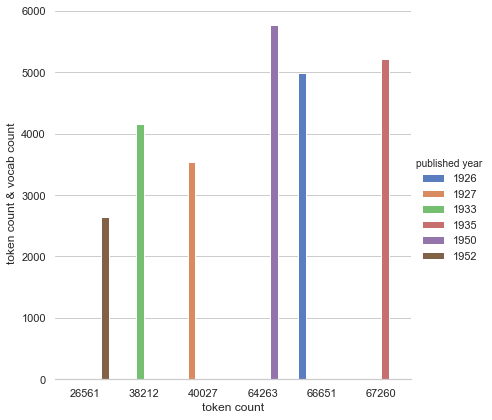

In [26]:
import seaborn as sns
sns.set(style="whitegrid")
g = sns.catplot(x="token count", y="vocab count",hue="published year", 
                data=df2, height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("token count & vocab count")

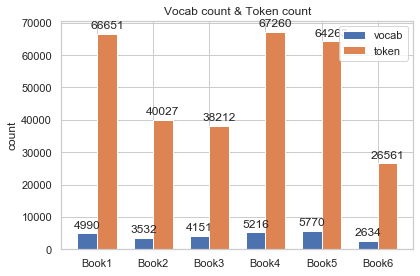

In [27]:


#labels = ['Book1', 'Book2', 'Book3', 'Book4', 'Book5','Book6']


import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Book1', 'Book2', 'Book3', 'Book4', 'Book5','Book6']
vocab_count = [4990, 3532, 4151, 5216, 5770, 2634]
token_count = [66651,40027,38212,67260,64263,26561]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, vocab_count, width, label='vocab')
rects2 = ax.bar(x + width/2, token_count, width, label='token')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_title('Vocab count & Token count')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# 3 seaborn 词汇丰富度

In [28]:
df2['lexical_diversity']

0    0.074868
1    0.088240
2    0.108631
3    0.077550
4    0.089787
5    0.099168
Name: lexical_diversity, dtype: float64

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#用行和列标签绘制
sns.data=df2
hm = hm_long.pivot("book", "publihsed year", "lexical_diversity")
# 绘制x-y-z的热力图，比如 年-月-销量 的热力图
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(hm, ax=ax)
#设置坐标字体方向
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360, horizontalalignment='right')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')
plt.show()

NameError: name 'hm_long' is not defined

In [30]:
import pandas as pd

In [34]:
lexical_diversity  = {'published year': ['1926','1927','1933','1935','1950', '1952'],
             'text': [1926,1927,1933,1935,1950,1952]}
lexical_diversity = pd.DataFrame(lexical_diversity,columns=['Book1','Book2','Book3','Book4','Book5','Book6'])

lexical_diversity['Book1'] = [0.074868,0,0,0,0,0]
lexical_diversity['Book2'] = [0,0.088240,0,0,0,0]
lexical_diversity['Book3'] = [0,0,0.108631,0,0,0]
lexical_diversity['Book4'] = [0,0,0,0.077550,0,0]
lexical_diversity['Book5'] = [0,0,0,0,0.089787,0]
lexical_diversity['Book6'] = [0,0,0,0,0,0.099168]
lexical_diversity

,Book1,Book2,Book3,Book4,Book5,Book6
0,0.074868,0.00000,0.000000,0.00000,0.000000,0.000000
1,0.000000,0.08824,0.000000,0.00000,0.000000,0.000000
2,0.000000,0.00000,0.108631,0.00000,0.000000,0.000000
3,0.000000,0.00000,0.000000,0.07755,0.000000,0.000000
4,0.000000,0.00000,0.000000,0.00000,0.089787,0.000000
5,0.000000,0.00000,0.000000,0.00000,0.000000,0.099168


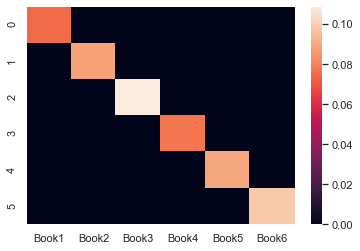

In [35]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
ax = sns.heatmap(lexical_diversity)

In [45]:
diversity = pd.read_csv('diversity.csv')
diversity

,published year,book,lexical_diversity
0,1926,1,0.074868
1,1927,2,0.088240
2,1933,3,0.108631
3,1935,4,0.077550
4,1950,5,0.089787
5,1952,6,0.099168


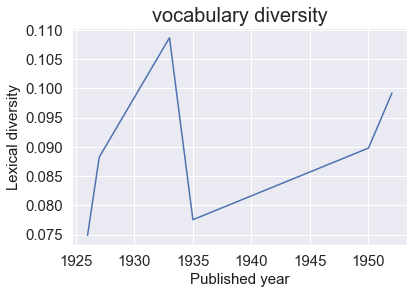

In [58]:
import seaborn as sns
sns.set(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="published year", y="lexical_diversity",data=diversity)

plt.xlabel('Published year',fontsize=15, color='k') #x轴label的文本和字体大小
plt.ylabel('Lexical diversity',fontsize=15, color='k') #y轴label的文本和字体大小
plt.xticks(fontsize=15) #x轴刻度的字体大小（文本包含在pd_data中了）
plt.yticks(fontsize=15) #y轴刻度的字体大小（文本包含在pd_data中了）
plt.title('vocabulary diversity',fontsize=20) #图片标题文本和字体大小
ax.set_yticklabels(ax.get_yticklabels(), rotation=360)

f.savefig('vocabulary diversity.jpg', dpi=100)

In [36]:
all_books

,book,published year,text,token,token count,vocab count,lexical_diversity,scores sentiment
0,book_1,1926,Robert Cohn was once middleweight boxing champ...,"[Robert, Cohn, was, once, middleweight, boxing...",66651,4990,0.074868,"{'neg': 0.06, 'neu': 0.835, 'pos': 0.105, 'com..."
1,book_2,1927,Manuel Garcia climbed the stairs to Don Miguel...,"[Manuel, Garcia, climbed, the, stairs, to, Don...",40027,3532,0.088240,"{'neg': 0.058, 'neu': 0.858, 'pos': 0.084, 'co..."
2,book_3,1933,"It wasn't about anything, something about maki...","[It, was, about, anything, something, about, m...",38212,4151,0.108631,"{'neg': 0.089, 'neu': 0.823, 'pos': 0.088, 'co..."
3,book_4,1935,IN OUR TIME FIESTA MEN WITHOUT WOMEN A FAREWEL...,"[IN, OUR, TIME, FIESTA, MEN, WITHOUT, WOMEN, A...",67260,5216,0.077550,"{'neg': 0.085, 'neu': 0.816, 'pos': 0.098, 'co..."
4,book_5,1950,ERNEST HEMINGWAY READERS UNION — JONATHAN ...,"[ERNEST, HEMINGWAY, READERS, UNION, JONATHAN, ...",64263,5770,0.089787,"{'neg': 0.08, 'neu': 0.782, 'pos': 0.138, 'com..."
5,book_6,1952,"ERNEST HEMINGWAY CHARLES SCRIBNER'S SONS, NE...","[ERNEST, HEMINGWAY, CHARLES, SCRIBNER, SONS, N...",26561,2634,0.099168,"{'neg': 0.07, 'neu': 0.82, 'pos': 0.111, 'comp..."


# 4 词频统计，生成corr heatmap

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download()

In [37]:
from nltk.corpus import stopwords 
stop = set(stopwords.words('english')) 
print(stop)

{'where', 'will', 'it', 'after', "needn't", 'at', 'they', 'shan', 'was', 'its', 'who', "mustn't", 'in', "shan't", 'were', 'can', 'a', 'up', 'during', "doesn't", 'you', 're', "shouldn't", 'theirs', 'we', 'or', 'from', "mightn't", 'm', 'all', 'there', 'on', 'by', 'didn', "she's", 'wouldn', 'the', "isn't", 'his', 'further', 'did', 'most', 'more', 'nor', 'do', 'doing', 'hasn', 'yours', 'what', 'have', 'than', 'for', 'mustn', "you've", 'out', "it's", 'isn', 'no', 'being', 'won', 'shouldn', 'then', 'her', 'only', "couldn't", 'those', 'i', 'few', "didn't", 'which', 'above', 'couldn', 'now', 'too', 'your', "should've", 'y', 'ma', 'myself', 'is', 'as', 'has', 'needn', 't', 'does', "weren't", 'over', 'be', 'should', 'ain', 'own', 'herself', 'wasn', 'each', 'are', 'ourselves', 'before', 'under', 'here', 'because', 'about', 'hers', 'other', 'weren', "you'll", 'yourself', 'how', 'but', 'don', 'when', 'me', "hasn't", 'to', "wasn't", 'through', 'd', 'him', 'into', "won't", "you're", 'off', 'if', 'tha

In [ ]:
def getText():
    txt = open("hemingwaye.txt", "r",encoding='UTF-8').read()
    txt = txt.lower()
    for ch in '!"#$%&()*+,-./:;<=>?@[\\]^_‘{|}~':
        txt = txt.replace(ch, " ")   #将文本中特殊字符替换为空格
    txt_f = [w for w in txt.split(' ') if w not in stopwords.words('english')]
    return txt_f

TXT = getText()
words = TXT.split()
counts = {}
for word in words:           
    counts[word] = counts.get(word,0) + 1
items = list(counts.items())
items.sort(key=lambda x:x[1], reverse=True) 
for i in range(10):
    word, count = items[i]
    print ("{0:<10}{1:>5}".format(word, count))


In [67]:
def getText():
    txt = open("hemingwaye.txt", "r",encoding='UTF-8').read()
    txt = txt.lower()
    for ch in '!"#$%&()*+,-./:;<=>?@[\\]^_‘{|}~\n':
        txt = txt.replace(ch, " ")   #将文本中特殊字符替换为空格
    txt_f = [w for w in txt.split(' ') if w not in stopwords.words('english')]
    return txt_f
TXT = getText()
df=pd.DataFrame({'word':TXT})
df['word'].value_counts().to_frame()[:12]

,word
,83018
',5054
said,4113
one,1272
would,935
like,926
good,923
know,842
could,841
back,809


In [80]:
wordl = df['word'].value_counts().to_frame()[:12]
wordl

,word
,83018
',5054
said,4113
one,1272
would,935
like,926
good,923
know,842
could,841
back,809


In [91]:
def getText():
    txt = open("1sunalsorises.txt", "r",encoding='UTF-8').read()
    txt = txt.lower()
    for ch in '!"#$%&()*+,-./:;<=>?@[\\]^_‘{|}~\n':
        txt = txt.replace(ch, " ")   #将文本中特殊字符替换为空格
    txt_f = [w for w in txt.split(' ') if w not in stopwords.words('english')]
    return txt_f
TXT = getText()
df=pd.DataFrame({'word':TXT})
df['word'].value_counts().to_frame()[:40]

,word
,24017
said,966
brett,414
bill,334
went,298
one,261
mike,246
go,237
bull,232
good,232


In [93]:
def getText():
    txt = open("2menwithoutwomen.txt", "r",encoding='UTF-8').read()
    txt = txt.lower()
    for ch in '!"#$%&()*+,-./:;<=>?@[\\]^_‘{|}~\n':
        txt = txt.replace(ch, " ")   #将文本中特殊字符替换为空格
    txt_f = [w for w in txt.split(' ') if w not in stopwords.words('english')]
    return txt_f
TXT = getText()
df=pd.DataFrame({'word':TXT})
df['word'].value_counts().to_frame()[:40]

,word
,14663
said,700
jack,249
manuel,221
bull,179
back,153
got,146
right,140
one,127
good,127


In [85]:
def getText():
    txt = open("3winnertakenothing.txt", "r",encoding='UTF-8').read()
    txt = txt.lower()
    for ch in '!"#$%&()*+,-./:;<=>?@[\\]^_‘{|}~\n':
        txt = txt.replace(ch, " ")   #将文本中特殊字符替换为空格
    txt_f = [w for w in txt.split(' ') if w not in stopwords.words('english')]
    return txt_f
TXT = getText()
df=pd.DataFrame({'word':TXT})
df['word'].value_counts().to_frame()[:20]

,word
,13566
said,689
one,229
like,136
go,133
would,131
right,128
know,122
fontan,112
could,101


In [95]:
def getText():
    txt = open("4greenhillsofafrica.txt", "r",encoding='UTF-8').read()
    txt = txt.lower()
    for ch in '!"#$%&()*+,-./:;<=>?@[\\]^_‘{|}~\n':
        txt = txt.replace(ch, " ")   #将文本中特殊字符替换为空格
    txt_f = [w for w in txt.split(' ') if w not in stopwords.words('english')]
    return txt_f
TXT = getText()
df=pd.DataFrame({'word':TXT})
df['word'].value_counts().to_frame()[:40]

,word
,10456
',1928
said,657
pop,346
one,340
m'cola,284
could,227
back,212
get,208
would,198


In [99]:
def getText():
    txt = open("5acrosstheriver.txt", "r",encoding='UTF-8').read()
    txt = txt.lower()
    for ch in '!"#$%&()*+,-./:;<=>?@[\\]^_‘{|}~\n':
        txt = txt.replace(ch, " ")   #将文本中特殊字符替换为空格
    txt_f = [w for w in txt.split(' ') if w not in stopwords.words('english')]
    return txt_f
TXT = getText()
df=pd.DataFrame({'word':TXT})
df['word'].value_counts().to_frame()[:60]

,word
,14693
',3059
said,912
colonel,754
'i,445
know,267
good,248
would,244
one,241
like,240


In [96]:
def getText():
    txt = open("6oldmanandthesea.txt", "r",encoding='UTF-8').read()
    txt = txt.lower()
    for ch in '!"#$%&()*+,-./:;<=>?@[\\]^_‘{|}~\n':
        txt = txt.replace(ch, " ")   #将文本中特殊字符替换为空格
    txt_f = [w for w in txt.split(' ') if w not in stopwords.words('english')]
    return txt_f
TXT = getText()
df=pd.DataFrame({'word':TXT})
df['word'].value_counts().to_frame()[:60]

,word
,5627
fish,271
old,252
man,251
said,189
thought,165
line,138
could,116
water,106
boy,98


In [18]:
wordl = pd.read_csv('wordl.csv',index_col = 0)
wordl

,Book1,Book2,Book3,Book4,Book5,Book6
said,966,700,689,657,912,189
one,261,127,229,340,241,74
would,188,79,131,198,244,95
like,223,112,136,169,240,46
good,232,127,97,172,248,47
know,212,101,122,104,267,36
could,129,78,101,227,190,116
back,191,153,86,212,81,86
go,237,125,133,139,121,44
get,204,119,85,208,124,43


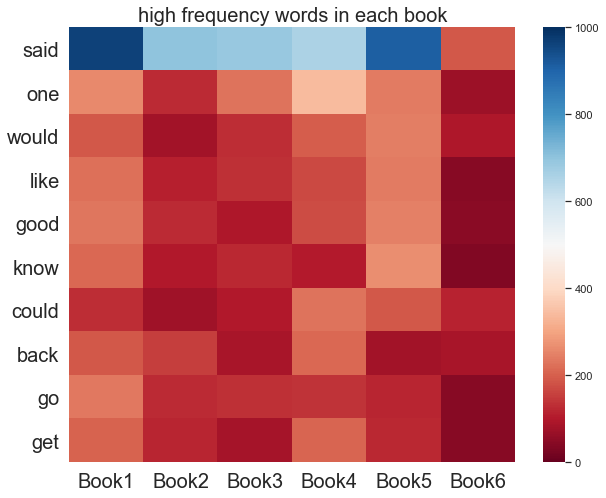

In [23]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()

f, ax= plt.subplots(figsize = (10, 8))

ax = sns.heatmap(wordl,cmap='RdBu',vmin=0, vmax=1000)



#cmap = sns.cm.rocket_r #colorbar颜色反转

#plt.xlabel('x_label',fontsize=20, color='k') #x轴label的文本和字体大小
#plt.ylabel('y_label',fontsize=20, color='k') #y轴label的文本和字体大小
plt.xticks(fontsize=20) #x轴刻度的字体大小（文本包含在pd_data中了）
plt.yticks(fontsize=20) #y轴刻度的字体大小（文本包含在pd_data中了）
plt.title('title',fontsize=20) #图片标题文本和字体大小
ax.set_yticklabels(ax.get_yticklabels(), rotation=360)

ax.set_title('high frequency words in each book',fontsize=20)
f.savefig('high frequency words in each book.jpg', dpi=100, bbox_inches='tight')

In [8]:
wordll = pd.read_csv('wordll.csv',index_col = 0)
wordll

,Book1,Book2,Book3,Book4,Book5,Book6
said,0.014493,0.017488,0.018031,0.009768,0.014192,0.007116
one,0.003916,0.003173,0.005993,0.005055,0.003750,0.002786
would,0.002821,0.001974,0.003428,0.002944,0.003797,0.003577
like,0.003346,0.002798,0.003559,0.002513,0.003735,0.001732
good,0.003481,0.003173,0.002538,0.002557,0.003859,0.001770
know,0.003181,0.002523,0.003193,0.001546,0.004155,0.001355
could,0.001935,0.001949,0.002643,0.003375,0.002957,0.004367
back,0.002866,0.003822,0.002251,0.003152,0.001260,0.003238
go,0.003556,0.003123,0.003481,0.002067,0.001883,0.001657
get,0.003061,0.002973,0.002224,0.003092,0.001930,0.001619


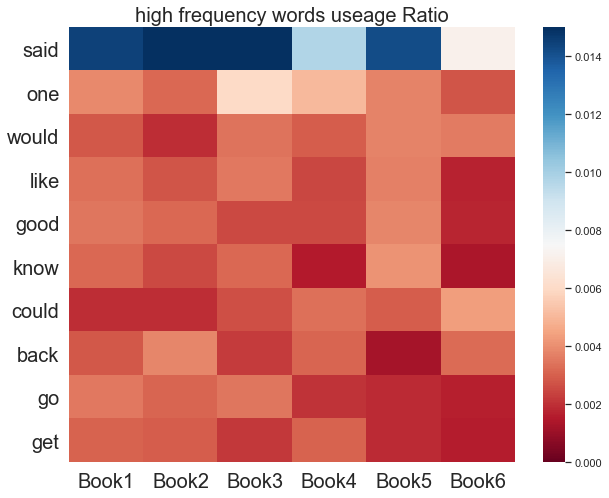

In [26]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()

f, ax= plt.subplots(figsize = (10, 8))

ax = sns.heatmap(wordll,cmap='RdBu',vmin=0, vmax=0.015)



#cmap = sns.cm.rocket_r #colorbar颜色反转

#plt.xlabel('x_label',fontsize=20, color='k') #x轴label的文本和字体大小
#plt.ylabel('y_label',fontsize=20, color='k') #y轴label的文本和字体大小
plt.xticks(fontsize=20) #x轴刻度的字体大小（文本包含在pd_data中了）
plt.yticks(fontsize=20) #y轴刻度的字体大小（文本包含在pd_data中了）
plt.title('title',fontsize=20) #图片标题文本和字体大小
ax.set_yticklabels(ax.get_yticklabels(), rotation=360)

ax.set_title('high frequency words useage Ratio',fontsize=20)
f.savefig('high frequency words useage Ratio.jpg', dpi=100, bbox_inches='tight')